In [5]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind


   user_id country gender device test_group converted  total_spent
0  1000000     CAN      M      I          B        No          0.0
1  1000001     BRA      M      A          A        No          0.0
2  1000002     FRA      M      A          A        No          0.0
3  1000003     BRA      M      I          B        No          0.0
4  1000004     DEU      F      A          A        No          0.0
Fail to reject null hypothesis: There is no significant difference between group A and group B in terms of total spent.


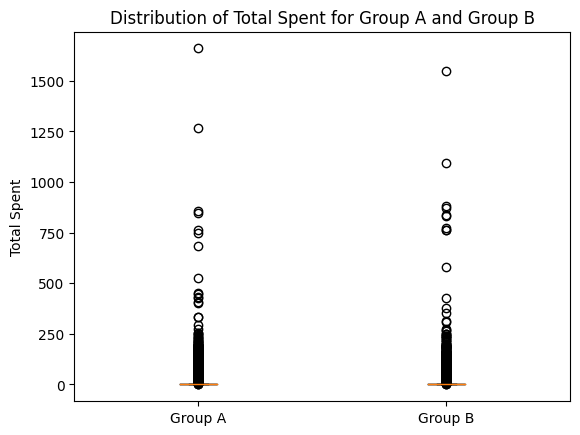

In [15]:
# Load the dataset
data = pd.read_csv("/kaggle/input/globox-ab-testing/globox_AB.csv")

# Check the first few rows of the dataset
print(data.head())

# Separate data into group A and group B
group_a = data[data['test_group'] == 'A']
group_b = data[data['test_group'] == 'B']

# Define Hypotheses:
# Null hypothesis: There is no difference in the metric between group A and group B
# Alternative hypothesis: There is a significant difference in the metric between group A and group B

# Calculate Test Statistic:
# Calculate the mean of the metric for each group
mean_a = group_a['total_spent'].mean()
mean_b = group_b['total_spent'].mean()

# Calculate the standard error of the mean for each group
std_a = group_a['total_spent'].std()
std_b = group_b['total_spent'].std()
n_a = len(group_a)
n_b = len(group_b)

# Calculate the t-statistic and p-value using an independent t-test
t_statistic, p_value = ttest_ind(group_a['total_spent'], group_b['total_spent'], equal_var=False)

# Interpret Results:
# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between group A and group B in terms of total spent.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between group A and group B in terms of total spent.")

# Visualize Results 
import matplotlib.pyplot as plt

# Create a box plot to visualize the distribution of the metric for each group
plt.boxplot([group_a['total_spent'], group_b['total_spent']], labels=['Group A', 'Group B'])
plt.ylabel('Total Spent')
plt.title('Distribution of Total Spent for Group A and Group B')
plt.show()


